In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fert=pd.read_csv('../Data_processed/FertilizerData.csv')
crop=pd.read_csv('../Data_processed/CropData.csv')

In [3]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [4]:
fert.drop('Unnamed: 0',axis=1,inplace=True)

fert.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,chickpea,40,60,80,5.5
3,kidneybeans,20,60,20,5.5
4,pigeonpeas,20,60,20,5.5


In [5]:
fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [6]:
fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Text(0, 0.5, 'Nitrogen (mg/g')

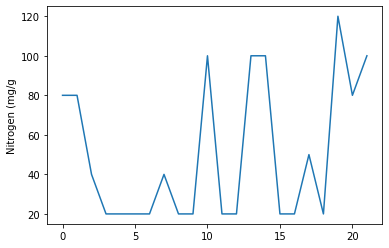

In [7]:
plt.plot(fert['N'])
plt.ylabel('Nitrogen (mg/g')

Text(0, 0.5, 'Phosphorus (mg/g)')

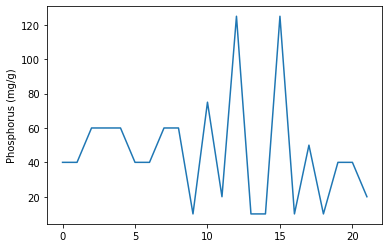

In [8]:
plt.plot(fert["P"])
plt.ylabel('Phosphorus (mg/g)')

Text(0, 0.5, 'Potassium (mg/g)')

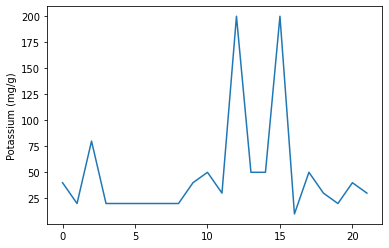

In [9]:
plt.plot(fert["K"])
plt.ylabel('Potassium (mg/g)')

<AxesSubplot:>

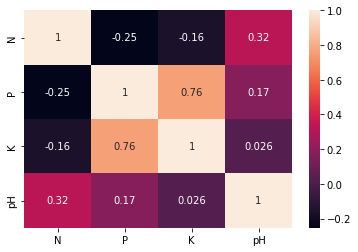

In [10]:
sns.heatmap(fert.corr(),annot=True)

In [11]:
r_fert=fert
crop.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
crop.drop('Unnamed: 0',axis=1,inplace=True)

crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


<b>Adding randomness in the range of tolerance</b>

In [13]:
import random
temp=pd.DataFrame(columns=['N','P','K'])
for i in range(len(crop)):
    t_crop=crop.label.iloc[i]
    N=r_fert[r_fert['Crop']==t_crop]['N'].iloc[0]+random.randint(-20,20)
    P=r_fert[r_fert['Crop']==t_crop]['P'].iloc[0]+random.randint(-5,20)
    K=r_fert[r_fert['Crop']==t_crop]['K'].iloc[0]+random.randint(-5,5)
    d={'N':N,'P':P,'K':K}
    temp=temp.append(d,ignore_index=True)

In [14]:
temp

,N,P,K
0,69,47,41
1,91,36,38
2,87,49,42
3,60,45,44
4,95,39,40
...,...,...,...
2195,119,21,32
2196,112,15,35
2197,97,36,30
2198,100,38,33


<b>Merging Crop and Fertilizer data</b>

In [15]:
crop['N']=temp['N']
crop['P']=temp['P']
crop['K']=temp['K']

In [16]:
crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,69,47,41
1,21.770462,80.319644,7.038096,226.655537,rice,91,36,38
2,23.004459,82.320763,7.840207,263.964248,rice,87,49,42
3,26.491096,80.158363,6.980401,242.864034,rice,60,45,44
4,20.130175,81.604873,7.628473,262.717340,rice,95,39,40
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,119,21,32
2196,27.417112,56.636362,6.086922,127.924610,coffee,112,15,35
2197,24.131797,67.225123,6.362608,173.322839,coffee,97,36,30
2198,26.272418,52.127394,6.758793,127.175293,coffee,100,38,33


In [17]:
crop=crop[['N','P','K','temperature','humidity','ph','rainfall','label']]

In [18]:
crop.to_csv('../Data_processed/CropRecommendation.csv',index=False)

In [19]:
df=pd.read_csv('../Data_processed/CropRecommendation.csv')

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,69,47,41,20.879744,82.002744,6.502985,202.935536,rice
1,91,36,38,21.770462,80.319644,7.038096,226.655537,rice
2,87,49,42,23.004459,82.320763,7.840207,263.964248,rice
3,60,45,44,26.491096,80.158363,6.980401,242.864034,rice
4,95,39,40,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,119,21,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,112,15,35,27.417112,56.636362,6.086922,127.924610,coffee
2197,97,36,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,100,38,33,26.272418,52.127394,6.758793,127.175293,coffee
